### Clean the data

In [33]:
from clean_data import *

wavs_train, labels_train = raw_to_list('..\\raw_data\\Train')
wavs_test, labels_test = raw_to_list('..\\raw_data\\Test')

### Featurize

In [34]:
from pyaudio_features import *

train = pyaudio_featurize(wavs_train)
test = pyaudio_featurize(wavs_test)

### Scale data

In [35]:
train, test = scaling(train,test)


### Merge labels

In [36]:
merge_labels(train,labels_train)
merge_labels(test,labels_test)

### Save Data to clean_data folder

In [37]:
train.to_csv('../clean_data/train/train.csv',index=False)
test.to_csv('../clean_data/test/test.csv',index=False)

### Load

In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('../clean_data/train/train.csv')
test = pd.read_csv('../clean_data/test/test.csv')

In [4]:
train.head()

zcr_mean  Band  energy_mean  energy_entropy_mean  spectral_centroid_mean  \
0 -0.493760     0    -0.075177            -1.374822               -0.760291   
1 -0.860183     0    -0.258162            -2.321780               -0.979656   
2 -0.080753     0    -0.677510            -0.061882               -0.457505   
3 -0.845201     0    -0.125606            -2.502710               -0.879924   
4 -0.748786     0    -0.126678            -0.940064               -1.073170   

   spectral_spread_mean  spectral_entropy_mean  spectral_flux_mean  \
0              0.253054              -0.932688            0.012879   
1              0.378817              -1.395490            0.501875   
2             -0.133479              -0.359586           -0.572551   
3              0.529751              -1.442855            2.146747   
4             -0.303256              -1.037239            0.120022   

   spectral_rolloff_mean  mfcc_1_mean  ...  delta chroma_4_std  \
0              -1.004936     0.033240  ...           -0.244853   
1              -1.556860    -0.118836  ...           -0.065375   
2              -0.299270     0.047309  ...           -0.370990   
3              -1.193728    -1.488053  ...            0.214203   
4              -1.045794    -0.015905  ...           -0.559481   

   delta chroma_5_std  delta chroma_6_std  delta chroma_7_std  \
0            0.205704            0.995404           -0.710273   
1           -0.031204            1.157963           -0.650813   
2            0.255490            1.200264            0.178234   
3           -0.752322           -0.375544           -0.818589   
4           -0.384156            0.136744            0.263119   

   delta chroma_8_std  delta chroma_9_std  delta chroma_10_std  \
0           -0.198581            0.197078             0.071867   
1            0.534467            0.397920             0.326455   
2            0.157390            1.118856             0.875055   
3            2.100130            0.518432            -0.422679   
4            0.612083            0.637809             0.996423   

   delta chroma_11_std  delta chroma_12_std  delta chroma_std_std  
0            -0.554416             0.278616             -0.259337  
1            -0.000337            -0.827544             -0.087340  
2            -0.522776            -0.417008             -0.257788  
3            -0.442207            -0.665052             -0.276125  
4            -0.513101             0.563118             -0.556920  

[5 rows x 137 columns]

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

In [31]:
rf = KNeighborsClassifier(n_neighbors=25)
rf.fit(train.drop(['Band'],axis=1),train['Band'])
preds = rf.predict(test.drop(['Band'],axis=1))
print(accuracy_score(test['Band'],preds))
print(confusion_matrix(test['Band'],preds))

0.48214285714285715
[[ 6  1  3  4]
 [ 2  9  3  0]
 [ 1  0 10  3]
 [ 1  2  9  2]]


0.42857142857142855


<Axes: >

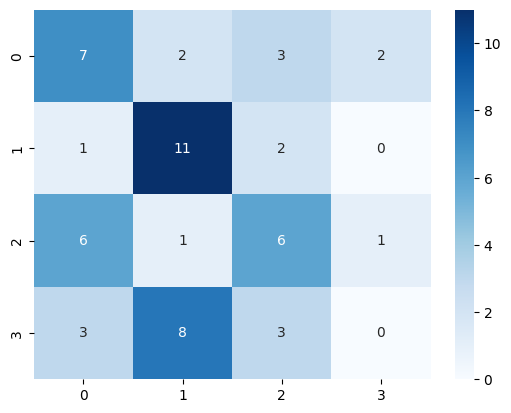

In [29]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(train.drop(['Band'],axis=1),train['Band'])
preds = model.predict(test.drop(['Band'],axis=1))
print(accuracy_score(test['Band'],preds))
conf = confusion_matrix(test['Band'],preds)
import seaborn as sns
sns.heatmap(conf, annot=True, cmap='Blues')

In [9]:
train.shape

(144, 69)

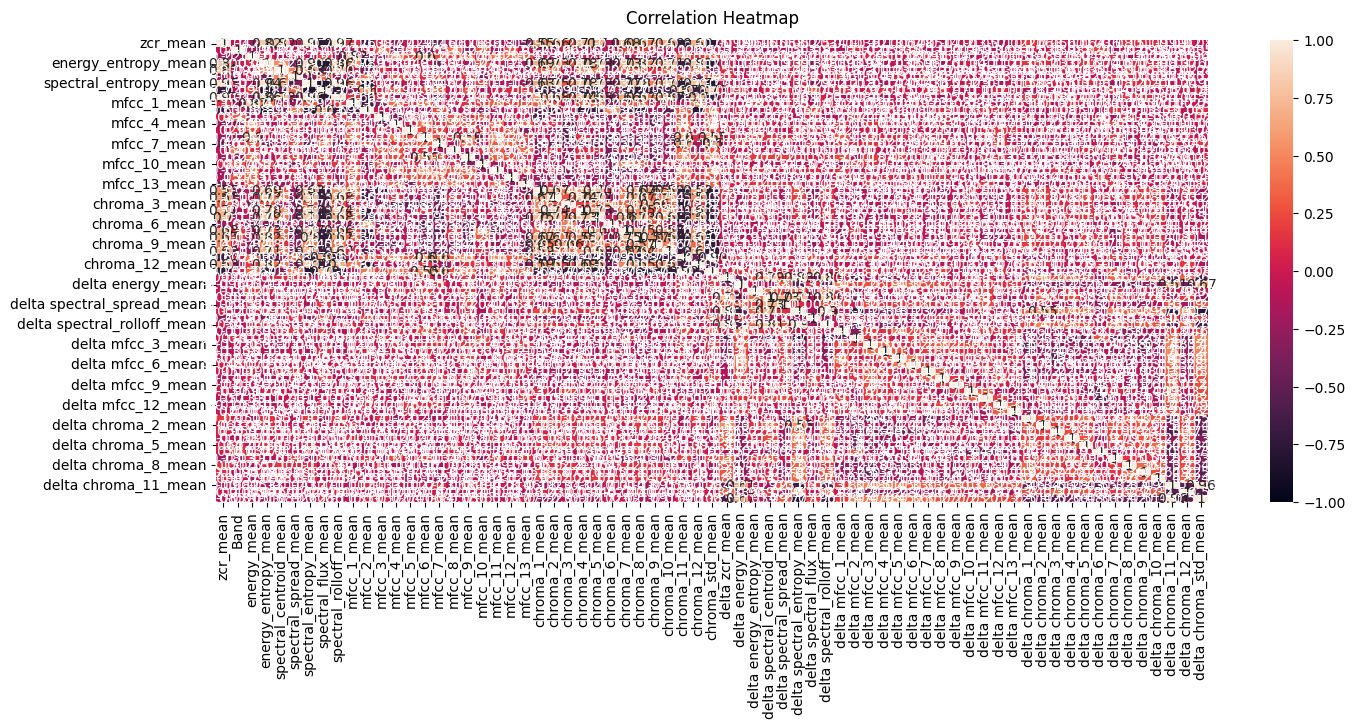

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

0.5357142857142857


<Axes: >

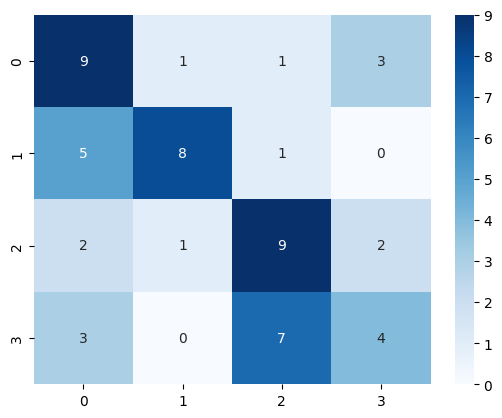

In [5]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
ada.fit(train.drop(['Band'],axis=1),train['Band'])
preds = ada.predict(test.drop(['Band'],axis=1))
print(accuracy_score(test['Band'],preds))
conf = confusion_matrix(test['Band'],preds)
import seaborn as sns
sns.heatmap(conf, annot=True, cmap='Blues')

0.48214285714285715


<Axes: >

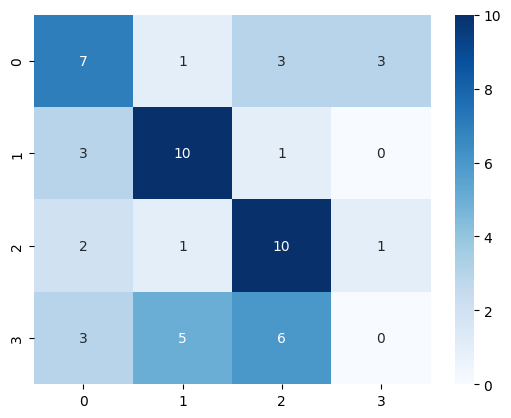

In [28]:
import seaborn
rf = RandomForestClassifier(n_estimators=1000,max_leaf_nodes=10,random_state=3)
rf.fit(train.drop(['Band'],axis=1),train['Band'])
preds = rf.predict(test.drop(['Band'],axis=1))
print(accuracy_score(test['Band'],preds))
conf = confusion_matrix(test['Band'],preds)
import seaborn as sns
sns.heatmap(conf, annot=True, cmap='Blues')

In [24]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import LeavePOut
import numpy as np

In [25]:
lpo = StratifiedShuffleSplit(n_splits=20,test_size=0.33,random_state=42)

In [26]:
# enumerate splits
# create model
model = RandomForestClassifier(n_estimators=100)
# evaluate model
scores = cross_val_score(model, train.drop(['Band'],axis=1), train['Band'], scoring='accuracy', cv=lpo)
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.774 (0.053)


In [27]:
model.fit(train.drop(['Band'],axis=1),train['Band'])
preds = model.predict(train.drop(['Band'],axis=1))
print(accuracy_score(train['Band'],preds))
print(confusion_matrix(train['Band'],preds))

1.0
[[36  0  0  0]
 [ 0 36  0  0]
 [ 0  0 36  0]
 [ 0  0  0 36]]


In [77]:
model = RandomForestClassifier(random_state=1,n_estimators=8)
model.fit(tr.drop(['Band'],axis=1),tr['Band'])

NameError: name 'tr' is not defined

In [9]:
preds = model.predict(test.drop(['Band'],axis=1))
preds_train = model.predict(tr.drop(['Band'],axis=1))

In [10]:
print(accuracy_score(test['Band'],preds))
print(confusion_matrix(test['Band'],preds))

0.6
[[6 2 2]
 [1 9 0]
 [6 1 3]]


In [27]:
models.KNN()

Accuracy for 1 neighbors: 0.814 (0.071)
Accuracy for 2 neighbors: 0.766 (0.087)
Accuracy for 3 neighbors: 0.812 (0.073)
Accuracy for 4 neighbors: 0.767 (0.084)
Accuracy for 5 neighbors: 0.738 (0.057)
Accuracy for 6 neighbors: 0.788 (0.055)
Accuracy for 7 neighbors: 0.759 (0.079)
Accuracy for 8 neighbors: 0.738 (0.082)
Accuracy for 9 neighbors: 0.753 (0.061)
Accuracy for 10 neighbors: 0.722 (0.069)
Accuracy for 11 neighbors: 0.757 (0.058)
Accuracy for 12 neighbors: 0.750 (0.066)
Accuracy for 13 neighbors: 0.724 (0.073)
Accuracy for 14 neighbors: 0.736 (0.079)
Accuracy for 15 neighbors: 0.712 (0.063)
Accuracy for 16 neighbors: 0.755 (0.069)
Accuracy for 17 neighbors: 0.738 (0.069)
Accuracy for 18 neighbors: 0.712 (0.075)
Accuracy for 19 neighbors: 0.719 (0.081)
Accuracy for 20 neighbors: 0.697 (0.061)
Accuracy for 21 neighbors: 0.714 (0.067)
Accuracy for 22 neighbors: 0.705 (0.064)
Accuracy for 23 neighbors: 0.731 (0.083)
Accuracy for 24 neighbors: 0.729 (0.080)
Accuracy for 25 neighbors

In [21]:
from sklearn.svm import SVC
C = [0.001,0.01,0.1,1,10,100,1000]
kernels = ['rbf','linear','poly']
for kernel in kernels:
    for c in C:
        model = SVC(C=c,kernel=kernel,probability=True)
        model.fit(train.drop(['Band'],axis=1),train['Band'])
        preds = model.predict(test.drop(['Band'],axis=1))
        print(accuracy_score(test['Band'],preds))
        print(confusion_matrix(test['Band'],preds))

0.5
[[11  1  1  1]
 [ 4  8  1  1]
 [ 5  0  8  1]
 [ 6  3  4  1]]
0.5
[[11  1  1  1]
 [ 4  8  1  1]
 [ 5  0  8  1]
 [ 6  3  4  1]]
0.5
[[11  1  1  1]
 [ 4  8  1  1]
 [ 5  0  8  1]
 [ 6  3  4  1]]
0.5
[[11  1  1  1]
 [ 3 10  1  0]
 [ 4  1  7  2]
 [ 6  3  5  0]]
0.5
[[12  1  1  0]
 [ 3  9  2  0]
 [ 4  1  7  2]
 [ 5  3  6  0]]
0.5
[[12  1  1  0]
 [ 3  9  2  0]
 [ 4  1  7  2]
 [ 5  3  6  0]]
0.5
[[12  1  1  0]
 [ 3  9  2  0]
 [ 4  1  7  2]
 [ 5  3  6  0]]
0.4642857142857143
[[ 6  3  2  3]
 [ 2 10  2  0]
 [ 2  2  9  1]
 [ 1  7  5  1]]
0.4642857142857143
[[ 8  3  1  2]
 [ 3 11  0  0]
 [ 1  4  7  2]
 [ 5  5  4  0]]
0.4642857142857143
[[10  2  0  2]
 [ 4  8  2  0]
 [ 1  3  8  2]
 [ 4  5  5  0]]
0.4642857142857143
[[10  2  0  2]
 [ 4  8  2  0]
 [ 1  3  8  2]
 [ 4  5  5  0]]
0.4642857142857143
[[10  2  0  2]
 [ 4  8  2  0]
 [ 1  3  8  2]
 [ 4  5  5  0]]
0.4642857142857143
[[10  2  0  2]
 [ 4  8  2  0]
 [ 1  3  8  2]
 [ 4  5  5  0]]
0.4642857142857143
[[10  2  0  2]
 [ 4  8  2  0]
 [ 1  3  8  2]
 

In [11]:
def train_val_KNN(train,val):
    neighbors = range(1,15)
    for ne in neighbors:
        model = KNeighborsClassifier(ne)
        model.fit(train.drop(['Band'],axis=1),train['Band'])
        train_preds = model.predict(train.drop(['Band'],axis=1))
        test_preds = model.predict(test.drop(['Band'],axis=1))
        print(f'---NEIGHBOR = {ne}')
        print('----------Train---------')
        print(accuracy_score(train['Band'],train_preds))
        print('----------Val---------')
        print(accuracy_score(test['Band'],test_preds))

In [19]:
def train_val_RF(train,test):
    estimators = range(1,50)
    for est in estimators:
        model = RandomForestClassifier(est)
        model.fit(train.drop(['Band'],axis=1),train['Band'])
        train_preds = model.predict(train.drop(['Band'],axis=1))
        test_preds = model.predict(test.drop(['Band'],axis=1))
        print(f'---Estimator = {est}')
        print('----------Train---------')
        print(accuracy_score(train['Band'],train_preds))
        print('----------Val---------')
        print(accuracy_score(test['Band'],test_preds))

In [40]:
model = LogisticRegression(max_iter=1000000)
model.fit(train.drop(['Band'],axis=1),train['Band'])
train_preds = model.predict(train.drop(['Band'],axis=1))
val_preds = model.predict(test.drop(['Band'],axis=1))
print('----------Train---------')
print(accuracy_score(train['Band'],train_preds))
print('----------Test---------')
print(accuracy_score(test['Band'],val_preds))

----------Train---------
1.0
----------Test---------
0.4642857142857143
